In [57]:
import pandas as pd
#
#pd.set_option("display.max_rows", None)
#pd.set_option("display.max_columns", None)
#pd.set_option("display.width", None)
#pd.set_option("display.max_colwidth", None)

DEMO_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/DEMO_L.xpt", format="xport")
DIQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/DIQ_L.xpt", format="xport")
GHB_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/GHB_L.xpt", format="xport")
GLU_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/GLU_L.xpt", format="xport")
HIQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/HIQ_L.xpt", format="xport")
HUQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/HUQ_L.xpt", format="xport")
INQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/INQ_L.xpt", format="xport")
UCPREG_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/UCPREG_L.xpt", format="xport")




In [58]:
df = DEMO_21_23
df = df.merge(DIQ_21_23, on="SEQN", how="left")
df = df.merge(GHB_21_23, on="SEQN", how="left")
df = df.merge(GLU_21_23, on="SEQN", how="left")
df = df.merge(HIQ_21_23, on="SEQN", how="left")
df = df.merge(HUQ_21_23, on="SEQN", how="left")
df = df.merge(INQ_21_23, on="SEQN", how="left")
df = df.merge(UCPREG_21_23, on="SEQN", how="left")

df.shape

(11933, 60)

In [59]:
df.columns.to_list()

['SEQN',
 'SDDSRVYR',
 'RIDSTATR',
 'RIAGENDR',
 'RIDAGEYR',
 'RIDAGEMN',
 'RIDRETH1',
 'RIDRETH3',
 'RIDEXMON',
 'RIDEXAGM',
 'DMQMILIZ',
 'DMDBORN4',
 'DMDYRUSR',
 'DMDEDUC2',
 'DMDMARTZ',
 'RIDEXPRG',
 'DMDHHSIZ',
 'DMDHRGND',
 'DMDHRAGZ',
 'DMDHREDZ',
 'DMDHRMAZ',
 'DMDHSEDZ',
 'WTINT2YR',
 'WTMEC2YR',
 'SDMVSTRA',
 'SDMVPSU',
 'INDFMPIR',
 'DIQ010',
 'DID040',
 'DIQ160',
 'DIQ180',
 'DIQ050',
 'DID060',
 'DIQ060U',
 'DIQ070',
 'WTPH2YR',
 'LBXGH',
 'WTSAF2YR',
 'LBXGLU',
 'LBDGLUSI',
 'HIQ011',
 'HIQ032A',
 'HIQ032B',
 'HIQ032C',
 'HIQ032D',
 'HIQ032E',
 'HIQ032F',
 'HIQ032H',
 'HIQ032I',
 'HIQ210',
 'HUQ010',
 'HUQ030',
 'HUQ042',
 'HUQ055',
 'HUQ090',
 'INDFMMPI',
 'INDFMMPC',
 'INQ300',
 'IND310',
 'URXPREG']

In [60]:
#df["bio_diabetes"] = df["LBXGH"].notna() & df["LBXGH"].ge(6.5)
#df["bio_diabetes"].value_counts()

#LBXGH = HbA1c level 

In [61]:
#df["LBXGH"].value_counts(dropna=False).sort_index(ascending=True)
#df = df[df["RIDAGEYR"] >= 20]

#df["bio_diabetes"].value_counts()
#(df["bio_diabetes"] == True).sum()

## Data cleaning (continued)

Below: remove duplicates, handle missing values, and recode NHANES "Refused" / "Don't know" where appropriate.

In [63]:
# 1. Duplicate check (SEQN should be unique per respondent)
n_before = len(df)
dup_mask = df.duplicated(subset=["SEQN"], keep="first")
n_dups = dup_mask.sum()
if n_dups > 0:
    df = df[~dup_mask]
    print(f"Dropped {n_dups} duplicate SEQN. Rows: {n_before} -> {len(df)}")
else:
    print("No duplicate SEQN found.")

No duplicate SEQN found.


In [64]:
df.columns.to_list()

['SEQN',
 'SDDSRVYR',
 'RIDSTATR',
 'RIAGENDR',
 'RIDAGEYR',
 'RIDAGEMN',
 'RIDRETH1',
 'RIDRETH3',
 'RIDEXMON',
 'RIDEXAGM',
 'DMQMILIZ',
 'DMDBORN4',
 'DMDYRUSR',
 'DMDEDUC2',
 'DMDMARTZ',
 'RIDEXPRG',
 'DMDHHSIZ',
 'DMDHRGND',
 'DMDHRAGZ',
 'DMDHREDZ',
 'DMDHRMAZ',
 'DMDHSEDZ',
 'WTINT2YR',
 'WTMEC2YR',
 'SDMVSTRA',
 'SDMVPSU',
 'INDFMPIR',
 'DIQ010',
 'DID040',
 'DIQ160',
 'DIQ180',
 'DIQ050',
 'DID060',
 'DIQ060U',
 'DIQ070',
 'WTPH2YR',
 'LBXGH',
 'WTSAF2YR',
 'LBXGLU',
 'LBDGLUSI',
 'HIQ011',
 'HIQ032A',
 'HIQ032B',
 'HIQ032C',
 'HIQ032D',
 'HIQ032E',
 'HIQ032F',
 'HIQ032H',
 'HIQ032I',
 'HIQ210',
 'HUQ010',
 'HUQ030',
 'HUQ042',
 'HUQ055',
 'HUQ090',
 'INDFMMPI',
 'INDFMMPC',
 'INQ300',
 'IND310',
 'URXPREG']

In [65]:
# 2. Missing value summary and drop high-missing columns
missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100
missing_agg = pd.DataFrame({"count": missing_count, "pct": missing_pct}).sort_values("count", ascending=False)
missing_agg = missing_agg[missing_agg["count"] > 0]

print("Columns with missing values (after filters):")
print(missing_agg.to_string())
print()

# Drop columns with more than 50% missing (optional; adjust threshold as needed)
THRESHOLD_PCT = 50
cols_to_drop = missing_agg[missing_agg["pct"] > THRESHOLD_PCT].index.tolist()
if cols_to_drop:
    df = df.drop(columns=cols_to_drop, errors="ignore")
    print(f"Dropped {len(cols_to_drop)} columns with >{THRESHOLD_PCT}% missing: {cols_to_drop}")
else:
    print(f"No columns with >{THRESHOLD_PCT}% missing.")
print(f"Shape after dropping high-missing columns: {df.shape}")

Columns with missing values (after filters):
          count         pct
RIDAGEMN   5964  100.000000
HIQ032E    5961   99.949698
DMDHSEDZ   5869   98.407109
HIQ032C    5817   97.535211
DMDHRMAZ   5773   96.797451
DMDHREDZ   5746   96.344735
RIDEXAGM   5738   96.210597
DMDHRGND   5731   96.093226
DMDHRAGZ   5730   96.076459
HIQ032I    5725   95.992622
HIQ032F    5714   95.808182
DIQ060U    5712   95.774648
DID060     5703   95.623742
HIQ032H    5514   92.454728
DIQ050     5144   86.250838
DID040     5144   86.250838
HIQ032D    5132   86.049631
URXPREG    4941   82.847082
RIDEXPRG   4938   82.796781
DMDYRUSR   4750   79.644534
DIQ070     4235   71.009390
HIQ032B    3896   65.325285
IND310     3310   55.499665
HIQ032A    2773   46.495641
LBDGLUSI   2662   44.634474
LBXGLU     2662   44.634474
WTSAF2YR   2607   43.712274
INDFMMPI   1187   19.902750
DIQ160     1037   17.387659
DIQ180      821   13.765929
INDFMPIR    765   12.826962
HUQ042      686   11.502347
HIQ210      517    8.668679
IND

In [66]:
df['LBXGH'].value_counts()

LBXGH
5.4     539
5.6     525
5.5     521
5.3     502
5.2     453
       ... 
3.8       1
13.1      1
10.5      1
12.1      1
9.0       1
Name: count, Length: 100, dtype: int64

In [67]:
# 3. NHANES "Refused" (7) and "Don't know" (9) → NaN for survey items only
# Only in questionnaire vars (DIQ, HIQ, HUQ, INQ); do not touch age, lab values, etc.
nhanes_special = [7, 9]
survey_prefixes = ("DIQ", "HIQ", "HUQ", "INQ")
cols_survey = [c for c in df.columns if c.startswith(survey_prefixes)]
for col in cols_survey:
    if df[col].isin(nhanes_special).any():
        n_replaced = df[col].isin(nhanes_special).sum()
        df[col] = df[col].replace(nhanes_special, float("nan"))
        if n_replaced > 0:
            print(f"  {col}: {n_replaced} values 7/9 -> NaN")
print("Done recoding Refused/Don't know to NaN for survey variables.")

  DIQ160: 9 values 7/9 -> NaN
  DIQ180: 176 values 7/9 -> NaN
  HIQ011: 13 values 7/9 -> NaN
  HIQ210: 9 values 7/9 -> NaN
  HUQ010: 2 values 7/9 -> NaN
  HUQ030: 2 values 7/9 -> NaN
  HUQ055: 7 values 7/9 -> NaN
  HUQ090: 10 values 7/9 -> NaN
  INQ300: 196 values 7/9 -> NaN
Done recoding Refused/Don't know to NaN for survey variables.


In [68]:
# 3b. NHANES "Don't know" (99) and "Refused" (999) → NaN (survey & demographic only; not age)
nhanes_99_999 = [99, 999]
# Survey + demographic prefixes; do not touch RIDAGEYR, lab values, or SEQN
recode_prefixes = ("DIQ", "HIQ", "HUQ", "INQ", "DMD", "DMQ")
cols_recode = [c for c in df.columns if c.startswith(recode_prefixes)]
for col in cols_recode:
    if df[col].isin(nhanes_99_999).any():
        n_replaced = df[col].isin(nhanes_99_999).sum()
        df[col] = df[col].replace(nhanes_99_999, float("nan"))
        if n_replaced > 0:
            print(f"  {col}: {n_replaced} values 99/999 -> NaN")
print("Done recoding 99/999 to NaN.")

# 3c. Replace near-zero / below-detection lab values (e.g. 5.4e-79) with NaN
lab_prefixes = ("LBX", "LBD")
cols_lab = [c for c in df.columns if c.startswith(lab_prefixes)]
for col in cols_lab:
    if df[col].dtype in ("float64", "float32"):
        below_lod = (df[col] > 0) & (df[col] < 1e-10)
        n_replaced = below_lod.sum()
        if n_replaced > 0:
            df.loc[below_lod, col] = float("nan")
            print(f"  {col}: {n_replaced} near-zero values -> NaN")
print("Done replacing near-zero lab values.")

  DMDMARTZ: 3 values 99/999 -> NaN
  HIQ032A: 46 values 99/999 -> NaN
  HUQ042: 2 values 99/999 -> NaN
Done recoding 99/999 to NaN.
Done replacing near-zero lab values.


In [69]:
# 4. Final missing-value summary (after all cleaning)
still_missing = df.isnull().sum()
still_missing = still_missing[still_missing > 0].sort_values(ascending=False)
if len(still_missing) > 0:
    print("Remaining columns with missing values:")
    print((still_missing / len(df) * 100).round(1).to_string())
else:
    print("No missing values remaining.")
print(f"\nFinal cleaned shape: {df.shape}")
df.info()

Remaining columns with missing values:
HIQ032A     47.3
LBXGLU      44.6
LBDGLUSI    44.6
WTSAF2YR    43.7
INDFMMPI    19.9
DIQ160      17.5
DIQ180      16.7
INDFMPIR    12.8
HUQ042      11.5
INQ300      11.2
HIQ210       8.8
INDFMMPC     8.0
DMDMARTZ     4.0
DMDEDUC2     3.9
HIQ011       0.2
HUQ090       0.2
HUQ055       0.1
HUQ010       0.0
HUQ030       0.0

Final cleaned shape: (5964, 37)
<class 'pandas.core.frame.DataFrame'>
Index: 5964 entries, 0 to 11932
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5964 non-null   float64
 1   SDDSRVYR  5964 non-null   float64
 2   RIDSTATR  5964 non-null   float64
 3   RIAGENDR  5964 non-null   float64
 4   RIDAGEYR  5964 non-null   float64
 5   RIDRETH1  5964 non-null   float64
 6   RIDRETH3  5964 non-null   float64
 7   RIDEXMON  5964 non-null   float64
 8   DMQMILIZ  5964 non-null   float64
 9   DMDBORN4  5964 non-null   float64
 10  DMDEDUC2  5730 non-null   flo

In [70]:
# 5. (Optional) Save cleaned dataframe to CSV for downstream use
df.to_csv("Cleaning_data_cleaned.csv", index=False)
print("Saved cleaned data to Cleaning_data_cleaned.csv")

Saved cleaned data to Cleaning_data_cleaned.csv


## Columns most related to LBXGH (HbA1c)

**LBXGH** = Glycated hemoglobin (HbA1c), a key diabetes biomarker. Below we rank numeric columns by strength of linear (Pearson) and monotonic (Spearman) correlation with LBXGH. Pairwise complete observations are used for each correlation.

In [71]:
# Relevance of each column w.r.t. LBXGH: Pearson & Spearman correlation
target = "LBXGH"
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
# Exclude target itself and ID/design vars that are not meaningful for association
exclude = {target, "SEQN"}
candidates = [c for c in numeric_cols if c not in exclude]

corrs = []
for col in candidates:
    valid = df[[target, col]].dropna(how="any")
    n = len(valid)
    if n < 30:  # skip if too few pairs
        continue
    r_pearson = valid[target].corr(valid[col], method="pearson")
    r_spearman = valid[target].corr(valid[col], method="spearman")
    corrs.append({
        "column": col,
        "n": n,
        "pearson": r_pearson,
        "spearman": r_spearman,
        "abs_pearson": abs(r_pearson),
        "abs_spearman": abs(r_spearman),
    })

corr_df = pd.DataFrame(corrs)
corr_df = corr_df.sort_values("abs_pearson", ascending=False).reset_index(drop=True)
corr_df = corr_df.round(4)
print("Top columns most related to LBXGH (by |Pearson|):")
display(corr_df[["column", "n", "pearson", "spearman", "abs_pearson"]].head(25))

Top columns most related to LBXGH (by |Pearson|):


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is 

,column,n,pearson,spearman,abs_pearson
0,LBDGLUSI,3302,0.8138,0.5777,0.8138
1,LBXGLU,3302,0.8138,0.5777,0.8138
2,DIQ010,5964,-0.5003,-0.3940,0.5003
3,HUQ010,5962,0.2635,0.2587,0.2635
4,RIDAGEYR,5964,0.2593,0.4390,0.2593
5,DIQ160,4918,-0.2486,-0.2882,0.2486
6,DMDEDUC2,5730,-0.2011,-0.2182,0.2011
7,DIQ180,4967,-0.1447,-0.1929,0.1447
8,INDFMPIR,5199,-0.1197,-0.1185,0.1197
9,INQ300,5295,0.1158,0.0899,0.1158


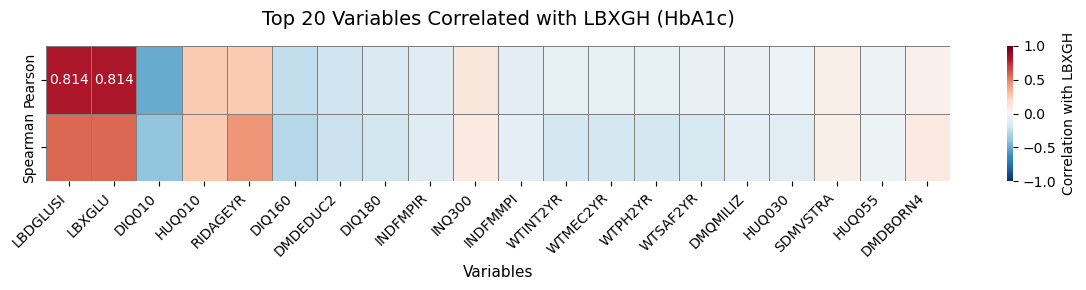


Heatmap shows Pearson (linear) and Spearman (monotonic) correlations.
Red = positive correlation, Blue = negative correlation with LBXGH.


In [72]:
# Visualize correlations with LBXGH as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for heatmap: top N variables
top_n = 20
top_corr = corr_df.head(top_n).copy()

# Create a matrix with Pearson and Spearman side by side
heatmap_data = top_corr[["pearson", "spearman"]].T
heatmap_data.columns = top_corr["column"].values

# Create figure
fig, ax = plt.subplots(figsize=(12, 3))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="RdBu_r",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Correlation with LBXGH"},
    yticklabels=["Pearson", "Spearman"],
    ax=ax,
    linewidths=0.5,
    linecolor="gray"
)
ax.set_title(f"Top {top_n} Variables Correlated with LBXGH (HbA1c)", fontsize=14, pad=15)
ax.set_xlabel("Variables", fontsize=11)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print(f"\nHeatmap shows Pearson (linear) and Spearman (monotonic) correlations.")
print(f"Red = positive correlation, Blue = negative correlation with LBXGH.")

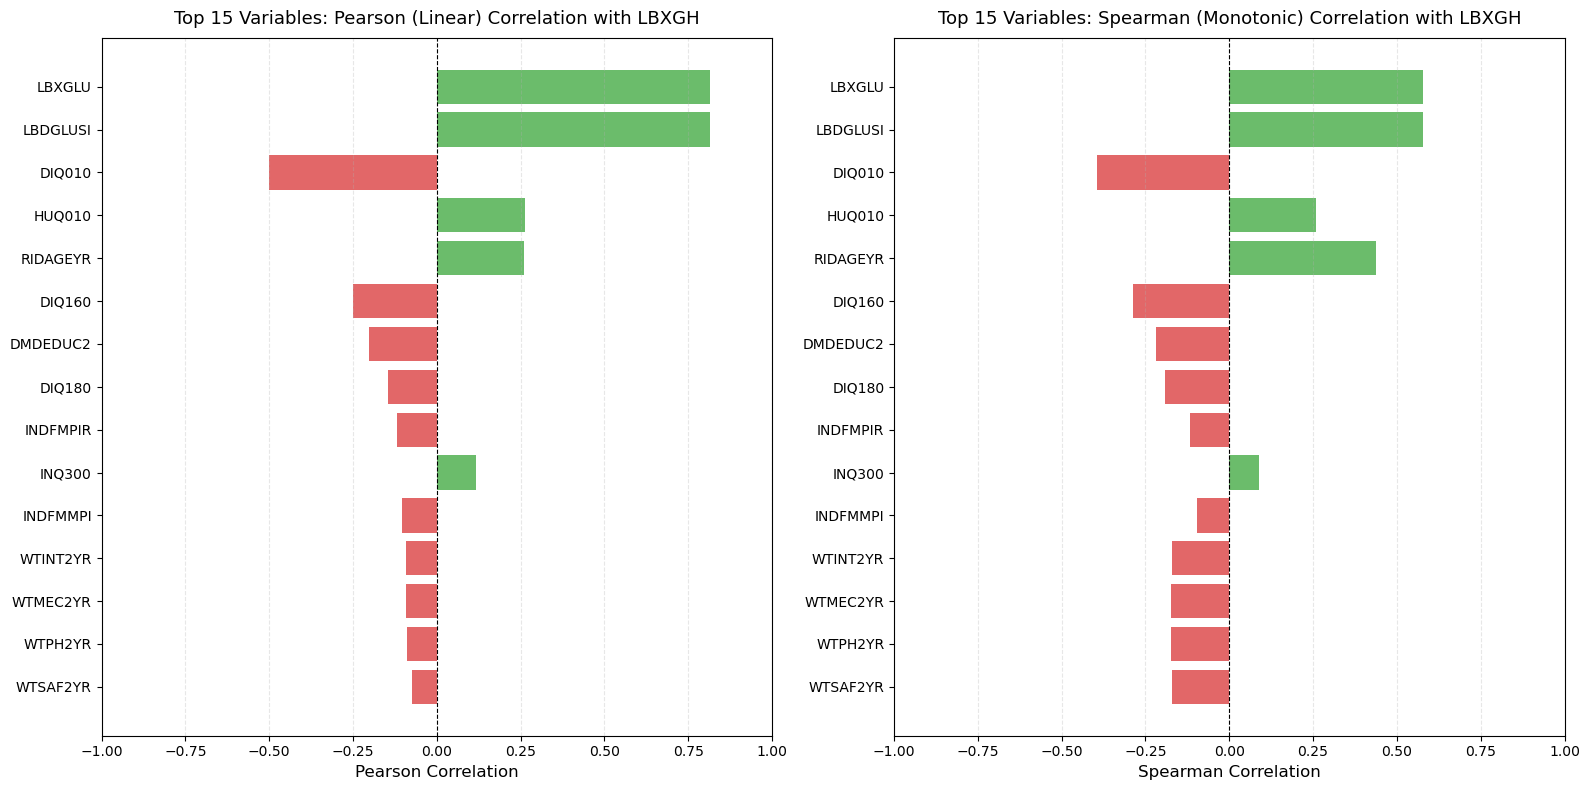

Red bars = Negative correlation, Green bars = Positive correlation


In [75]:
# Alternative: Bar chart visualization of correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top N for visualization
top_n = 15
top_corr_viz = corr_df.head(top_n).copy()

# Sort by absolute Pearson for consistent ordering
top_corr_viz = top_corr_viz.sort_values("abs_pearson", ascending=True)

# Bar chart for Pearson correlation
colors_pearson = ["#2ca02c" if x > 0 else "#d62728" for x in top_corr_viz["pearson"]]
ax1.barh(top_corr_viz["column"], top_corr_viz["pearson"], color=colors_pearson, alpha=0.7)
ax1.axvline(x=0, color="black", linestyle="--", linewidth=0.8)
ax1.set_xlabel("Pearson Correlation", fontsize=12)
ax1.set_title(f"Top {top_n} Variables: Pearson (Linear) Correlation with LBXGH", fontsize=13, pad=10)
ax1.grid(axis="x", alpha=0.3, linestyle="--")
ax1.set_xlim(-1, 1)

# Bar chart for Spearman correlation
colors_spearman = ["#2ca02c" if x > 0 else "#d62728" for x in top_corr_viz["spearman"]]
ax2.barh(top_corr_viz["column"], top_corr_viz["spearman"], color=colors_spearman, alpha=0.7)
ax2.axvline(x=0, color="black", linestyle="--", linewidth=0.8)
ax2.set_xlabel("Spearman Correlation", fontsize=12)
ax2.set_title(f"Top {top_n} Variables: Spearman (Monotonic) Correlation with LBXGH", fontsize=13, pad=10)
ax2.grid(axis="x", alpha=0.3, linestyle="--")
ax2.set_xlim(-1, 1)

plt.tight_layout()
plt.show()

print("Red bars = Negative correlation, Green bars = Positive correlation")

In [76]:
# Brief interpretation: variable meanings (NHANES)
# Top correlates of LBXGH (HbA1c) are typically:
# - LBXGLU / LBDGLUSI: fasting glucose (same lab, different units) — strong positive correlation expected
# - DIQ010: Doctor told you have diabetes (1=Yes, 2=No, 3=Borderline) — strong association
# - RIDAGEYR: Age — often positive (HbA1c tends to rise with age)
# - INDFMPIR: Income-to-poverty ratio — often negative (lower income ↔ higher diabetes risk)
# - DMDEDUC2, DMDMARTZ: Education, marital status — demographic/social determinants
# - DIQ160, DIQ180: Diabetes-related questionnaire items
# - HIQ011, HIQ210: Health insurance
# Variables with |pearson| > 0.3 are usually the most relevant for modeling or stratification.
top_relevant = corr_df.head(15)["column"].tolist()
print("Most relevant columns for LBXGH (use in models or stratification):", top_relevant)

Most relevant columns for LBXGH (use in models or stratification): ['LBDGLUSI', 'LBXGLU', 'DIQ010', 'HUQ010', 'RIDAGEYR', 'DIQ160', 'DMDEDUC2', 'DIQ180', 'INDFMPIR', 'INQ300', 'INDFMMPI', 'WTINT2YR', 'WTMEC2YR', 'WTPH2YR', 'WTSAF2YR']
